##### 1. What is a Convolutional Neural Network (CNN), and why is it used for image processing?
A Convolutional Neural Network (CNN) is a type of deep learning model designed specifically for processing data with grid-like topology, such as images.
CNNs automatically extract hierarchical features from raw pixel data using convolution, pooling, and non-linear activations.
Use in Image Processing:

Detect edges, textures, shapes, and objects.

Reduce manual feature engineering.

Achieve high accuracy in tasks like classification, detection, segmentation.



##### 2. What are the key components of a CNN architecture?
Input Layer: Takes image data.

Convolutional Layer: Extracts features using filters.

Activation Function: Adds non-linearity (e.g., ReLU).

Pooling Layer: Downsamples features to reduce dimensions.

Fully Connected Layer: Makes final predictions.

Output Layer: Provides the output (classification, etc.)



##### 3. What is the role of the convolutional layer in CNNs?
The convolutional layer performs feature extraction by sliding a filter over the input image to produce feature maps. It captures local patterns like edges, textures, or complex structures.



##### 4. What is a filter (kernel) in CNNs?
A filter (or kernel) is a small matrix (e.g., 3×3) of learnable parameters used in the convolution operation.
It slides over the input and performs element-wise multiplication and sum, detecting specific patterns.

##### 5. What is pooling in CNNs, and why is it important?
Pooling reduces the spatial dimensions of feature maps, retaining important information while reducing computation.
Importance:

Controls overfitting.

Reduces computational cost.

Provides translation invariance.



##### 6. What are the common types of pooling used in CNNs?
Max Pooling: Takes the maximum value in the window.

Average Pooling: Takes the average value.

Global Pooling: Pools over the entire feature map.



##### 7. How does the backpropagation algorithm work in CNNs?
Backpropagation in CNNs:

Computes gradients of loss w.r.t weights in all layers using chain rule.

Updates weights in convolutional and fully connected layers.

Uses optimizers like SGD or Adam to minimize the loss.



##### 8. What is the role of activation functions in CNNs?
Activation functions add non-linearity, allowing CNNs to model complex data.
Common activations:

ReLU: max(0, x)

Sigmoid, Tanh, etc.

##### 9. What is the concept of receptive fields in CNNs?
A receptive field is the region of the input image that influences a particular output neuron.
It determines how much of the input data each neuron "sees".

##### 10. Explain the concept of tensor space in CNNs.
In CNNs, data is represented as tensors (multi-dimensional arrays).
For images:

2D: Grayscale image (height × width)

3D: Colored image (height × width × channels)



##### 11. What is LeNet-5, and how does it contribute to CNNs?
LeNet-5 (1998) is one of the earliest CNN architectures designed for handwritten digit recognition (MNIST).
Contributions:

Introduced convolution + pooling + fully connected layers.

Set the foundation for modern CNNs.

##### 12. What is AlexNet, and why was it a breakthrough?
AlexNet (2012) won the ImageNet challenge with a large margin.
Breakthrough because:

Used ReLU, dropout, and GPUs for training.

Achieved record-breaking accuracy.

##### 13. What is VGGNet, and how does it differ from AlexNet?
VGGNet (2014):

Uses small (3×3) convolutional filters.

Deep architecture (16/19 layers).

Simpler but deeper than AlexNet.



##### 14. What is GoogLeNet, and what is its main innovation?
GoogLeNet (2014):

Introduced Inception modules for parallel convolutions.

Reduced computation while increasing depth.

##### 15. What is ResNet, and what problem does it solve?
ResNet (2015):

Introduced residual connections (skip connections).

Solved vanishing gradient problem, allowing training of very deep networks (50+ layers).

##### 16. What is DenseNet, and how does it differ from ResNet?
DenseNet connects each layer to every other layer in a feed-forward manner.
Differences from ResNet:

Dense connectivity.

Reduces redundant feature maps.

More efficient feature reuse.

##### 17. What are the main steps involved in training a CNN from scratch?
Prepare data (preprocessing, augmentation).

Initialize model (CNN architecture).

Forward pass (compute predictions).

Compute loss.

Backpropagation (compute gradients).

Update weights using optimizer.

Repeat for multiple epochs.



## Practical Questions 

#### 1. Implement a basic convolution operation

In [3]:
import numpy as np

image = np.array([[1, 2, 3, 0, 1],
                  [4, 5, 6, 1, 0],
                  [7, 8, 9, 0, 1],
                  [1, 2, 3, 4, 5],
                  [6, 7, 8, 9, 0]])

kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

output = np.zeros((3,3))

for i in range(3):
    for j in range(3):
        output[i,j] = np.sum(image[i:i+3, j:j+3] * kernel)

print("Convolution Output:\n", output)


Convolution Output:
 [[-6. 14. 16.]
 [-6. 10. 12.]
 [-6.  4. 14.]]


#### 2. Implement max pooling on a 4×4 feature map

In [4]:
feature_map = np.array([[1, 3, 2, 4],
                        [5, 6, 7, 8],
                        [9, 10, 11, 12],
                        [13, 14, 15, 16]])

pooled = np.zeros((2,2))

for i in range(2):
    for j in range(2):
        pooled[i,j] = np.max(feature_map[i*2:i*2+2, j*2:j*2+2])

print("Max Pooling Output:\n", pooled)


Max Pooling Output:
 [[ 6.  8.]
 [14. 16.]]


#### 3. Implement ReLU activation

In [5]:
feature_map = np.array([[1, -3, 2],
                        [-5, 6, -7]])

relu_output = np.maximum(0, feature_map)

print("ReLU Output:\n", relu_output)


ReLU Output:
 [[1 0 2]
 [0 6 0]]


#### 4. Create a simple CNN model with one convolutional layer

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import warnings
warnings.filterwarnings('ignore')


model = models.Sequential([
    layers.Conv2D(8, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         5,409 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,489 (21.44 KB)

 Trainable params: 5,489 (21.44 KB)

 Non-trainable params: 0 (0.00 B)

#### 5. Generate synthetic dataset and train CNN

In [4]:
import numpy as np
x_train = np.random.rand(100,28,28,1)
y_train = np.random.randint(0,2,100)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)


Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4204 - loss: 0.7186
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6390 - loss: 0.6528
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5765 - loss: 0.6845


#### 6. Create a simple CNN with Keras

In [5]:
model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2))
])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160 (640.00 B)

 Trainable params: 160 (640.00 B)

 Non-trainable params: 0 (0.00 B)

#### 7. Add a fully connected layer
 


In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        27,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,210 (106.29 KB)

 Trainable params: 27,210 (106.29 KB)

 Non-trainable params: 0 (0.00 B)

#### 8. Add batch normalization

In [7]:
model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        27,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,274 (106.54 KB)

 Trainable params: 27,242 (106.41 KB)

 Non-trainable params: 32 (128.00 B)

#### Q9. Write code to add dropout regularization

In [8]:
model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        27,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,210 (106.29 KB)

 Trainable params: 27,210 (106.29 KB)

 Non-trainable params: 0 (0.00 B)

#### Q10. Write code to print the architecture of the VGG16 model in Keras

from tensorflow.keras.applications import VGG16

vgg = VGG16()
vgg.summary()


#### Q11. Write code to plot accuracy and loss graphs after training

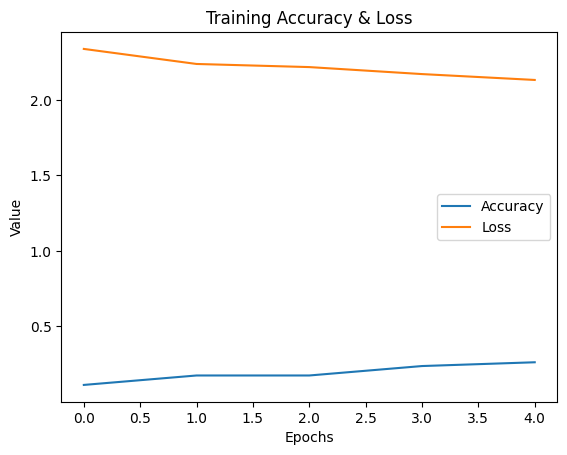

In [11]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Create a simple CNN model
model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Generate random data (synthetic dataset for demo purpose)
x_train = np.random.rand(100,28,28,1)
y_train = np.random.randint(0,10,100)

# Train the model and save history
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2, verbose=0)

# Plot training accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.title("Training Accuracy & Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.show()


#### Q12. Write code to print the architecture of the ResNet50 model in Keras
 


In [12]:
from tensorflow.keras.applications import ResNet50

resnet = ResNet50()
resnet.summary()


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_7[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

#### Q13. Write code to train a basic CNN model and print the training loss and accuracy after each epoch

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

x_train = np.random.rand(100,28,28,1)
y_train = np.random.randint(0,10,100)

model.fit(x_train, y_train, epochs=3)


Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0860 - loss: 2.3259 
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1260 - loss: 2.2388
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1518 - loss: 2.2206
